# Homework 3

## Problem 1

### (a) Create and print out a scatter plot of this dataset, eruption time versus waiting time.

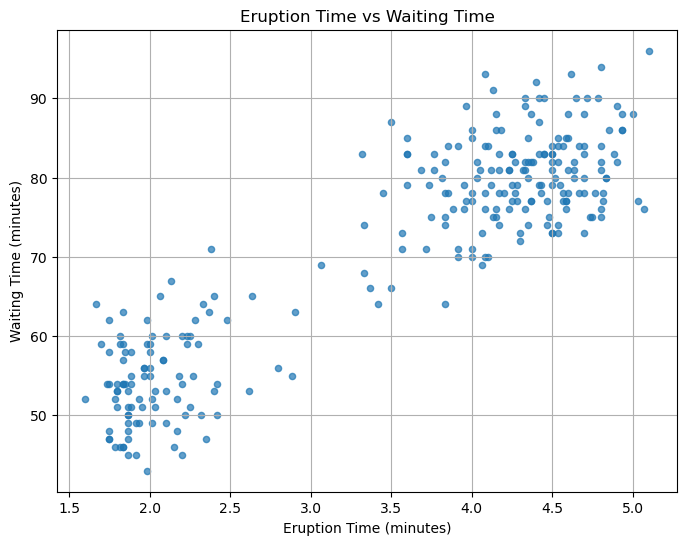

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('faithful.csv')

plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], s=20, alpha=0.7)
plt.title('Eruption Time vs Waiting Time')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()

### (b) How many clusters do you see based on your scatter plot?

### Ans.) 
    I identify 2 clusters in the above scatter plot.

    

### (c) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?

### Ans.) 
    Steps involved in the Hierarchical Clustering Algorithm are, 
    - Start with each data point as its own cluster.
    - Calculate the distance between all clusters.
    - Merge the two closest clusters into one.
    - Repeat Steps 2 and 3 until there is only one cluster or the desired number of clusters is reached.
    - Optionally, cut the dendrogram at a chosen height to determine the cluster assignments.

    After analyzing the above scatter plot, we can identify seperate clusters. So therefore this method is appropriate for the given dataset.

## Problem 2

### (a) Your source code for the k-means algorithm. You need to implement the algorithm from scratch.

In [25]:
X = data[['eruptions', 'waiting']].values

class KMeans:
    def __init__(self, n_clusters, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_idx]
        
        for iteration in range(self.max_iter):
            self.labels = self._assign_clusters(X)
            
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            
            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

### (b) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot.

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

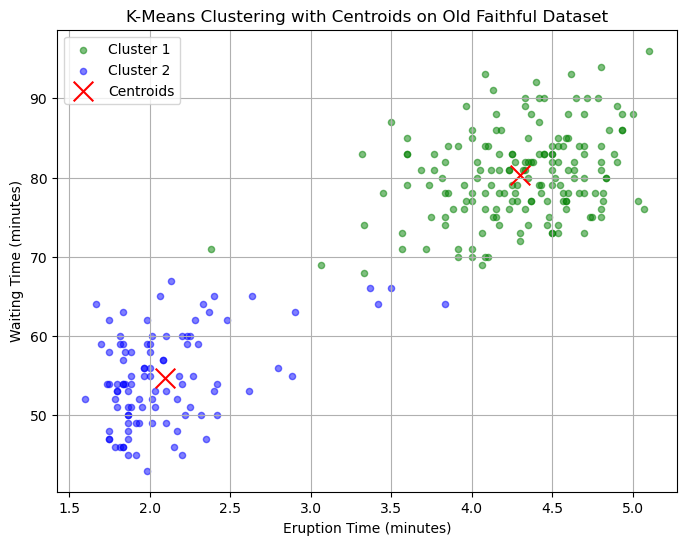

In [98]:
plt.figure(figsize=(8, 6))
colors = ['green', 'blue']
for k in range(kmeans_with_obj.n_clusters):
    cluster_points = X[kmeans_with_obj.labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=20, color=colors[k], label=f'Cluster {k+1}', alpha=0.5)

plt.scatter(
    kmeans_with_obj.centroids[:, 0],
    kmeans_with_obj.centroids[:, 1],
    s=200,
    color='red',
    label='Centroids',
     marker='x'
)

plt.title('K-Means Clustering with Centroids on Old Faithful Dataset')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

### (c) A plot of the k-means objective function versus iterations of the algorithm.

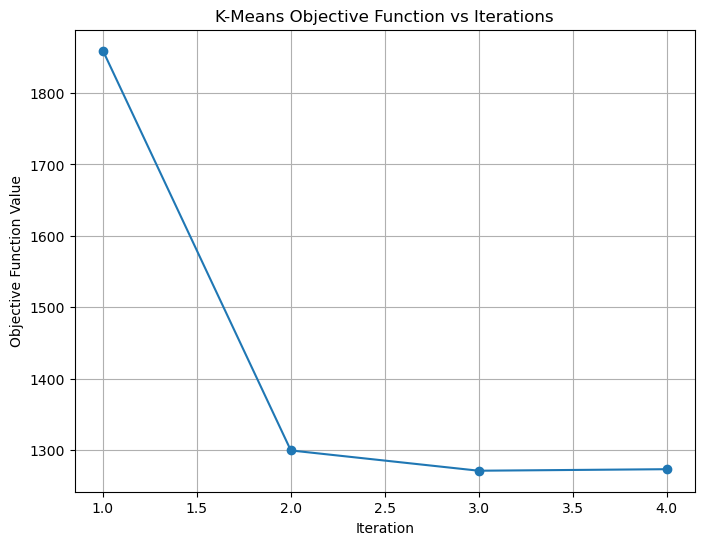

In [66]:
class KMeansWithObjective(KMeans):
    def fit(self, X):
        self.objective_function = []
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_idx]

        for iteration in range(self.max_iter):
            self.labels = self._assign_clusters(X)
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            objective = np.sum(np.min(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1))
            self.objective_function.append(objective)

            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids

kmeans_with_obj = KMeansWithObjective(n_clusters=2)
kmeans_with_obj.fit(X)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(kmeans_with_obj.objective_function) + 1), kmeans_with_obj.objective_function, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()

### (d) Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization?

### Ans.) 
    Yes it did manage to identify the centroids for the clusters I identified in Problem 1.